In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [74]:
df_index = pd.read_csv('Houseprices.csv')

In [75]:
df_index.head()

,Price,Living Area,Bathrooms,Bedrooms,Lot Size,Age,Fireplace
0,142212,1982,1.0,3,2.00,133,0
1,134865,1676,1.5,3,0.38,14,1
2,118007,1694,2.0,3,0.96,15,1
3,138297,1800,1.0,2,0.48,49,1
4,129470,2088,1.0,3,1.84,29,1


In [76]:
df_index.isnull().sum()

Price          0
Living Area    0
Bathrooms      0
Bedrooms       0
Lot Size       0
Age            0
Fireplace      0
dtype: int64

C:\Users\abyji\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


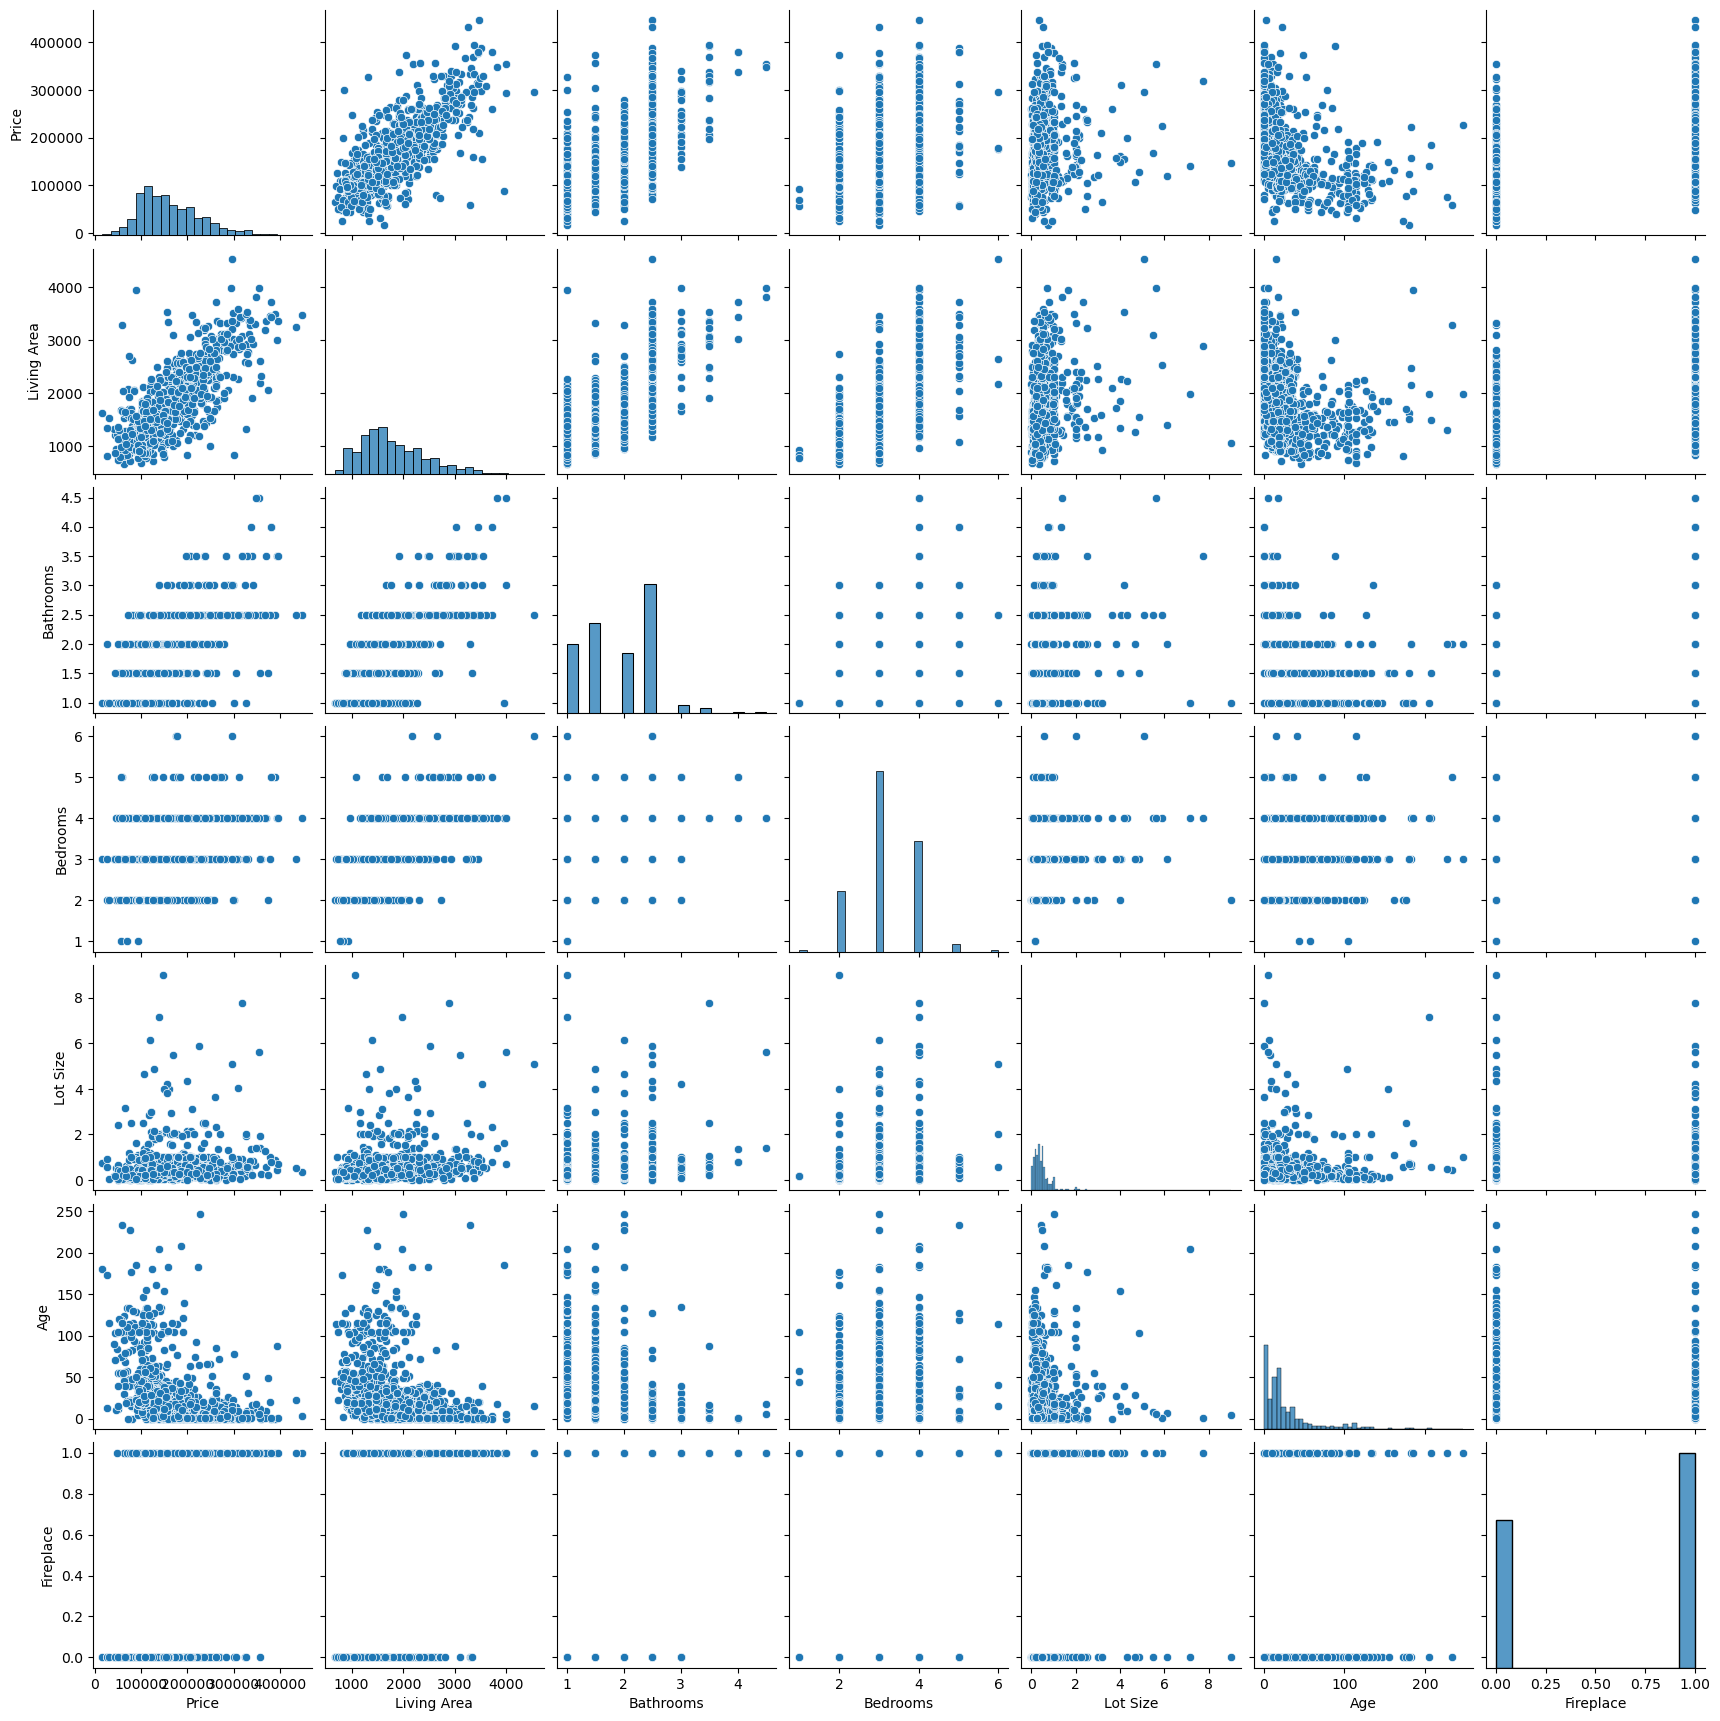

In [77]:
sns.pairplot(df_index)

In [78]:
df_index.corr()

,Price,Living Area,Bathrooms,Bedrooms,Lot Size,Age,Fireplace
Price,1.000000,0.776396,0.670189,0.471074,0.155284,-0.363354,0.460237
Living Area,0.776396,1.000000,0.722649,0.664347,0.200180,-0.263168,0.481436
Bathrooms,0.670189,0.722649,1.000000,0.491798,0.100993,-0.443830,0.444700
Bedrooms,0.471074,0.664347,0.491798,1.000000,0.140682,-0.060598,0.295873
Lot Size,0.155284,0.200180,0.100993,0.140682,1.000000,0.015135,0.052765
Age,-0.363354,-0.263168,-0.443830,-0.060598,0.015135,1.000000,-0.248794
Fireplace,0.460237,0.481436,0.444700,0.295873,0.052765,-0.248794,1.000000


In [79]:
df_index.columns

Index(['Price', 'Living Area', 'Bathrooms', 'Bedrooms', 'Lot Size', 'Age',
       'Fireplace'],
      dtype='object')

In [80]:
df_index.head()

,Price,Living Area,Bathrooms,Bedrooms,Lot Size,Age,Fireplace
0,142212,1982,1.0,3,2.00,133,0
1,134865,1676,1.5,3,0.38,14,1
2,118007,1694,2.0,3,0.96,15,1
3,138297,1800,1.0,2,0.48,49,1
4,129470,2088,1.0,3,1.84,29,1


In [81]:
x = df_index.drop(['Price'], axis=1) 

In [82]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [83]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [84]:
c = lr.intercept_
m = lr.coef_

In [85]:
c

20113.272534176678

In [86]:
m

array([   64.44236734, 16105.35718602, -1822.46594072,  2796.63968465,
        -225.9014113 ,  9243.54056637])

In [87]:
y_pred = lr.predict(x_test)

In [88]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 1980406867.1799626
R-squared: 0.594507172395651


In [93]:
x_new = pd.DataFrame({
    'Living Area': [600],  
    'Bathrooms': [1],
    'Bedrooms': [1],
    'Lot Size': [0.2],
    'Age': [2],
    'Fireplace': [0],
 })   

In [94]:
y_new_pred = lr.predict(x_new)
print("Predicted price for new data:", y_new_pred[0]) 

Predicted price for new data: 73169.1092973751
